## Simple point source analysis in 3ML+i3mla for IceCube

Step 0 . If you are on cvmfs, run \
eval $(/cvmfs/icecube.opensciencegrid.org/py3-v4.2.1//setup.sh)\
pip install --user --upgrade importlib-metadata==6.0.0\
python -m pip install --user git+https://github.com/threeML/threeML.git@v2.4.0 \
python -m pip install --user git+https://github.com/icecube/i3mla.git@v1p4 \
to setup the environment

### Import the needed package

For this PS analysis, we will need numpy, threeML, astromodels and i3mla

In [1]:
import os, sys, glob, abc
import numpy as np
import mla
import mla.threeml
import astromodels
import threeML
import warnings
import numpy.lib.recfunctions as rf
def read(filelist): #use to read data and append sindec field
    data = []

    for f in sorted(filelist):
        x = np.load(f)
        if len(data) == 0: data = x.copy()
        else: data = np.concatenate([data, x])

    try:
        data=rf.append_fields(data, 'sindec',
                              np.sin(data['dec']),
                              usemask=False)
    except:
        pass
    return data

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Welcome to JupyROOT 6.24/06


11:15:24 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=577209;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=225027;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=321484;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=647308;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

11:15:25 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=509713;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=566748;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

11:15:27 INFO      Starting 3ML!                                                                     ]8;id=847610;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=672853;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=179865;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=1191;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=23205;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=583829;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=437029;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=804184;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   no display variable set. using backend for graphics without display (agg)         ]8;id=126708;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=93214;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py#46\46]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=781059;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=95952;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=673193;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=698294;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\


WARNING UserWarning: Robust OAS shrunk covariance estimator from `sklearn` is not available. Defaulting to MLE estimator from `numpy`.



11:15:28 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=322608;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=237850;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=185293;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=71816;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=990532;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=607315;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

11:15:28 WARNING   No fermitools installed                                              ]8;id=178852;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=375603;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=48641;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=872887;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=304506;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=742147;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=547669;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=515147;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

### Setting data path and source injection details

In [2]:
DATA_PATH = "/data/i3store/users/analyses/ps_tracks/version-004-p02/" #change it if you are not in umd cluster
source_name = "Crab" #gamma-ray folks love the crab
inject_ra = 83.6279 #in degree here
inject_dec = 22.0243 #in degree here


### Setting the injection spectrum

In [3]:
injection_spectrum=threeML.Log_parabola()
#notice that the ra and dec don't matter, it is only for the spectrum
injection_source=mla.threeml.IceCubeLike.NeutrinoPointSource(source_name, ra=inject_ra, dec=inject_dec, spectral_shape=injection_spectrum)

injection_spectrum.alpha  = -2.79 #HAWC result
injection_spectrum.beta  = 0.1 #HAWC result
injection_spectrum.piv = 3.5 * threeML.u.TeV #match HAWC 7 TeV gamma-ray pivot
#Notice we don't care about flux here since we are injecting fix number of neutrino
injection_model=threeML.Model(injection_source)
injection_spectrum.set_units(threeML.u.keV,threeML.u.keV**-1*threeML.u.second**-1*threeML.u.cm**-2) #Fixing the unit help the calculation 

In [4]:
inject_spectrum = mla.threeml.IceCubeLike.Spectrum(injection_model) #Setting for injection

### Setting the config for i3mla

In [5]:
config = mla.generate_default_config([
    mla.threeml.data_handlers.ThreeMLDataHandler,
    mla.PointSource,
    mla.SpatialTermFactory,
    mla.threeml.sob_terms.ThreeMLPSIRFEnergyTermFactory,
    mla.TimeTermFactory, #We don't use time here, but I kept it for illurastion 
    mla.LLHTestStatisticFactory 
])
config['PointSource']['name'] = source_name
config['PointSource']['ra'] = np.deg2rad(inject_ra) #again, only for injection
config['PointSource']['dec'] = np.deg2rad(inject_dec)#only for injection
config['ThreeMLDataHandler']['dec_bandwidth (rad)'] = np.deg2rad(1)
config['ThreeMLDataHandler']['dec_cut_location']=np.deg2rad(inject_dec)# only for injection
config['ThreeMLDataHandler']['flux_unit_conversion'] =1e6 #keV to GeV(This is the default, but I want to show it here)
config['ThreeMLPSIRFEnergyTermFactory']['Energy_convesion(ToGeV)'] =1e6 #keV to GeV(This is the default, but I want to show it here)
#Notice the above two unit need to match the converion in 3ML
source = mla.PointSource(config['PointSource'])

### loading all the data(here use all IC86, IC79, IC59 and IC40)

#### First is IC86

In [6]:
# Read in all of the MC files 
sim_files = DATA_PATH + "/IC86*MC*npy"
sim = np.load([i for i in glob.glob(sim_files) if "2011" not in i][0])
#sim = mla.trimsim(sim,0.3)
sim=rf.append_fields(sim, 'sindec',
                     np.sin(sim['dec']),
                     usemask=False)


# Read in all of the data files
data_files = DATA_PATH + "/IC86_*exp.npy"
listofdata = []
data = read([i for i in glob.glob(data_files)])


# Set the angular error floor to 0.2 degrees
data['angErr'][data['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
sim['angErr'][sim['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
#np.random.seed(2) #for reproduce
data['ra'] = np.random.uniform(0, 2*np.pi, size=len(data))
grlfile = DATA_PATH + "/GRL/IC86*_exp.npy"
grl = read([i for i in glob.glob(grlfile)])
livetime = np.sum(grl['livetime'])
bkg_days = np.sort(grl['stop'])[-1]-np.sort(grl['start'])[0]
#background_time_profile = mla.time_profiles.UniformProfile({'start':np.sort(grl['start'])[0], 'length':bkg_days}) #Change it if you want to do dependent
#inject_signal_time_profile = mla.time_profiles.UniformProfile({'start':np.sort(grl['start'])[0], 'length':bkg_days}) #Change it if you want to do dependent
if 'sindec' not in data.dtype.names:
    data = rf.append_fields(
        data,
        'sindec',
        np.sin(data['dec']),
        usemask=False,
    )
if 'sindec' not in sim.dtype.names:
    sim = rf.append_fields(
        sim,
        'sindec',
        np.sin(sim['dec']),
        usemask=False,
    )


#### Create all the needed i3mla objects

In [7]:
data_handler = mla.threeml.data_handlers.ThreeMLDataHandler(
    config['ThreeMLDataHandler'], sim, (data, grl))
data_handler.injection_spectrum = inject_spectrum


spatial_term_factory = mla.SpatialTermFactory(config['SpatialTermFactory'], data_handler, source)
energy_term_factory = mla.threeml.sob_terms.ThreeMLPSIRFEnergyTermFactory(config['ThreeMLPSIRFEnergyTermFactory'], data_handler,source)
llh_factory = mla.LLHTestStatisticFactory(config['LLHTestStatisticFactory'],[spatial_term_factory,energy_term_factory])#,time_term_factory])
icecube=mla.threeml.IceCubeLike.IceCubeLike(source_name,data,data_handler,llh_factory,source,verbose=False,livetime = livetime)


WARNING VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


WARNING RuntimeWarning: invalid value encountered in true_divide



#### Repeat for all other data

In [8]:
# Read in all of the MC files 
sim_files = DATA_PATH + "/IC79*MC*npy"
sim = np.load([i for i in glob.glob(sim_files)][0])
#n_keep = int(0.5*len(sim)) #server don't have that much memory for me to 
#sim = np.random.choice(sim, n_keep)
sim=rf.append_fields(sim, 'sindec',
                     np.sin(sim['dec']),
                     usemask=False)
# Read in all of the data files
data_files = DATA_PATH + "/IC79_*exp.npy"
listofdata = []
data = read([i for i in glob.glob(data_files)])


# Set the angular error floor to 0.2 degrees
data['angErr'][data['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
sim['angErr'][sim['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
#np.random.seed(2) #for reproduce
data['ra'] = np.random.uniform(0, 2*np.pi, size=len(data))
grlfile = DATA_PATH + "/GRL/IC79*_exp.npy"
grl = read([i for i in glob.glob(grlfile)])
livetime = np.sum(grl['livetime'])
bkg_days = np.sort(grl['stop'])[-1]-np.sort(grl['start'])[0]
background_time_profile = mla.time_profiles.UniformProfile({'start':np.sort(grl['start'])[0], 'length':bkg_days})
inject_signal_time_profile = mla.time_profiles.UniformProfile({'start':np.sort(grl['start'])[0], 'length':bkg_days})
if 'sindec' not in data.dtype.names:
    data = rf.append_fields(
        data,
        'sindec',
        np.sin(data['dec']),
        usemask=False,
    )
if 'sindec' not in sim.dtype.names:
    sim = rf.append_fields(
        sim,
        'sindec',
        np.sin(sim['dec']),
        usemask=False,
    )


data_handler_79 = mla.threeml.data_handlers.ThreeMLDataHandler(
    config['ThreeMLDataHandler'], sim, (data, grl))
data_handler_79.injection_spectrum = inject_spectrum

spatial_term_factory_79 = mla.SpatialTermFactory(config['SpatialTermFactory'], data_handler_79, source)
energy_term_factory_79 = mla.threeml.sob_terms.ThreeMLPSIRFEnergyTermFactory(config['ThreeMLPSIRFEnergyTermFactory'], data_handler_79,source)
llh_factory_79 = mla.LLHTestStatisticFactory(config['LLHTestStatisticFactory'],[spatial_term_factory_79,energy_term_factory_79])#,time_term_factory_79])
icecube_79=mla.threeml.IceCubeLike.IceCubeLike("temp_79",data,data_handler_79,llh_factory_79,source,verbose=False,livetime = livetime)
               
#Loading all the data , MC and good run list

# Read in all of the MC files 
sim_files = DATA_PATH + "/IC59*MC*npy"
sim = np.load([i for i in glob.glob(sim_files)][0])
#n_keep = int(0.5*len(sim)) #server don't have that much memory for me to 
#sim = np.random.choice(sim, n_keep)
sim=rf.append_fields(sim, 'sindec',
                     np.sin(sim['dec']),
                     usemask=False)


# Read in all of the data files
data_files = DATA_PATH + "/IC59_*exp.npy"
listofdata = []
data = read([i for i in glob.glob(data_files)])


# Set the angular error floor to 0.2 degrees
data['angErr'][data['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
sim['angErr'][sim['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
#np.random.seed(3) #for reproduce
data['ra'] = np.random.uniform(0, 2*np.pi, size=len(data))
grlfile = DATA_PATH + "/GRL/IC59*_exp.npy"
grl = read([i for i in glob.glob(grlfile)])
livetime = np.sum(grl['livetime'])
bkg_days = np.sort(grl['stop'])[-1]-np.sort(grl['start'])[0]
background_time_profile = mla.time_profiles.UniformProfile({'start':np.sort(grl['start'])[0], 'length':bkg_days})
inject_signal_time_profile = mla.time_profiles.UniformProfile({'start':np.sort(grl['start'])[0], 'length':bkg_days})
if 'sindec' not in data.dtype.names:
    data = rf.append_fields(
        data,
        'sindec',
        np.sin(data['dec']),
        usemask=False,
    )
if 'sindec' not in sim.dtype.names:
    sim = rf.append_fields(
        sim,
        'sindec',
        np.sin(sim['dec']),
        usemask=False,
    )


data_handler_59 = mla.threeml.data_handlers.ThreeMLDataHandler(
    config['ThreeMLDataHandler'], sim, (data, grl))
data_handler_59.injection_spectrum = inject_spectrum

spatial_term_factory_59 = mla.SpatialTermFactory(config['SpatialTermFactory'], data_handler_59, source)
energy_term_factory_59 = mla.threeml.sob_terms.ThreeMLPSIRFEnergyTermFactory(config['ThreeMLPSIRFEnergyTermFactory'], data_handler_59,source)
llh_factory_59 = mla.LLHTestStatisticFactory(config['LLHTestStatisticFactory'],[spatial_term_factory_59,energy_term_factory_59])#,time_term_factory_59])
icecube_59=mla.threeml.IceCubeLike.IceCubeLike("temp_59",data,data_handler_59,llh_factory_59,source,verbose=False,livetime = livetime)               
        
#Loading all the data , MC and good run list

# Read in all of the MC files 
sim_files = DATA_PATH + "/IC40*MC*npy"
sim = np.load([i for i in glob.glob(sim_files)][0])
#n_keep = int(0.5*len(sim)) #server don't have that much memory for me to 
#sim = np.random.choice(sim, n_keep)
sim=rf.append_fields(sim, 'sindec',
                     np.sin(sim['dec']),
                     usemask=False)


# Read in all of the data files
data_files = DATA_PATH + "/IC40_*exp.npy"
listofdata = []
data = read([i for i in glob.glob(data_files)])


# Set the angular error floor to 0.2 degrees
data['angErr'][data['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
sim['angErr'][sim['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
#np.random.seed(2) #for reproduce
data['ra'] = np.random.uniform(0, 2*np.pi, size=len(data))
grlfile = DATA_PATH + "/GRL/IC40*_exp.npy"
grl = read([i for i in glob.glob(grlfile)])
livetime = np.sum(grl['livetime'])
bkg_days = np.sort(grl['stop'])[-1]-np.sort(grl['start'])[0]
background_time_profile = mla.time_profiles.UniformProfile({'start':np.sort(grl['start'])[0], 'length':bkg_days})
inject_signal_time_profile = mla.time_profiles.UniformProfile({'start':np.sort(grl['start'])[0], 'length':bkg_days})
if 'sindec' not in data.dtype.names:
    data = rf.append_fields(
        data,
        'sindec',
        np.sin(data['dec']),
        usemask=False,
    )
if 'sindec' not in sim.dtype.names:
    sim = rf.append_fields(
        sim,
        'sindec',
        np.sin(sim['dec']),
        usemask=False,
    )


data_handler_40 = mla.threeml.data_handlers.ThreeMLDataHandler(
    config['ThreeMLDataHandler'], sim, (data, grl))
data_handler_40.injection_spectrum = inject_spectrum

spatial_term_factory_40 = mla.SpatialTermFactory(config['SpatialTermFactory'], data_handler_40, source)
energy_term_factory_40 = mla.threeml.sob_terms.ThreeMLPSIRFEnergyTermFactory(config['ThreeMLPSIRFEnergyTermFactory'], data_handler_40,source)
llh_factory_40 = mla.LLHTestStatisticFactory(config['LLHTestStatisticFactory'],[spatial_term_factory_40,energy_term_factory_40])#,time_term_factory_40])
icecube_40=mla.threeml.IceCubeLike.IceCubeLike("temp_40",data,data_handler_40,llh_factory_40,source,verbose=False,livetime = livetime)   


WARNING RuntimeWarning: invalid value encountered in true_divide


WARNING RuntimeWarning: invalid value encountered in true_divide


WARNING RuntimeWarning: invalid value encountered in true_divide



#### Then combine all IceCubeLike objecti into icecube_analysis object

In [9]:
analysislist = mla.threeml.IceCubeLike.icecube_analysis([icecube,icecube_79,icecube_59,icecube_40])



WARNING VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



### Source hypothesis

In [10]:
#Setting the source hypothesis
#Here I will use the same as injection
#Setting the source hypothesis
#Here I will use the same as injection
hypo_spectrum=threeML.Log_parabola()
hypo_source=mla.threeml.IceCubeLike.NeutrinoPointSource(source_name, ra=inject_ra, dec=inject_dec, spectral_shape=hypo_spectrum) 
hypo_spectrum.piv = 3.5 * threeML.u.TeV #match HAWC 7 TeV gamma-ray pivot
hypo_spectrum.alpha = -2
hypo_spectrum.alpha.bounds = (-5.0, -1.0)
hypo_spectrum.beta = 0
hypo_spectrum.beta.bounds = (-1., 2.)
hypo_spectrum.K.fix = True #Instead we will use newton method
hypo_spectrum.set_units(threeML.u.keV,threeML.u.keV**-1*threeML.u.second**-1*threeML.u.cm**-2) #Fixing the unit help the calculation 
model=threeML.Model(hypo_source)
analysislist.newton_flux_norm = True #We will not fit the flux with 3ML to speed up

### Background trial

Now we have everything we need, we could start to do a background trial

In [11]:
analysislist.newton_flux_norm = True #We will not fit the flux with 3ML to speed up
hypo_spectrum.K.fix = True #Instead we will use newton method

In [12]:
warnings.filterwarnings("ignore")
analysislist.injection(poisson=True) #Inject no signal, only scrambling background
IceCubedata = threeML.DataList(analysislist)
jl = threeML.JointLikelihood(model, IceCubedata)
jl.set_minimizer('scipy') #scipy is faster if you are only interested in shape, not flux norm
jl.fit(quiet=True,compute_covariance=False)

11:17:48 INFO      set the minimizer to minuit                                             ]8;id=715313;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=864623;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to SCIPY                                              ]8;id=294729;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=256552;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

11:17:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=204239;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=186078;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

(                                          value  negative_error  \
 Crab.spectrum.main.Log_parabola.alpha -1.000050             0.0   
 Crab.spectrum.main.Log_parabola.beta   0.248109             0.0   
 
                                        positive_error  error unit  
 Crab.spectrum.main.Log_parabola.alpha             0.0    0.0       
 Crab.spectrum.main.Log_parabola.beta              0.0    0.0       ,
          -log(likelihood)
 combine         -0.301334
 total           -0.301334)

### Signal trial

In [13]:
#Setting the source hypothesis
#Here I will use the same as injection
hypo_spectrum=threeML.Log_parabola()
hypo_source=mla.threeml.IceCubeLike.NeutrinoPointSource(source_name, ra=inject_ra, dec=inject_dec, spectral_shape=hypo_spectrum) 
hypo_spectrum.piv = 3.5 * threeML.u.TeV #match HAWC 7 TeV gamma-ray pivot
hypo_spectrum.alpha = -2
hypo_spectrum.alpha.bounds = (-5.0, -1.0)
hypo_spectrum.beta = 0
hypo_spectrum.beta.bounds = (-1., 2.)
hypo_spectrum.K.fix = True #Instead we will use newton method
hypo_spectrum.set_units(threeML.u.keV,threeML.u.keV**-1*threeML.u.second**-1*threeML.u.cm**-2) #Fixing the unit help the calculation 
model=threeML.Model(hypo_source)
analysislist.newton_flux_norm = True #We will not fit the flux with 3ML to speed up


Let try to inject 50 neutrinos, it is close to 5 sigma discovery level of the crab based on the spectrum

In [14]:

analysislist.injection(n_signal=50,poisson=True) #Inject signal+scrambling background
IceCubedata = threeML.DataList(analysislist)
jl = threeML.JointLikelihood(model, IceCubedata)
jl.set_minimizer('scipy')
jl.fit(quiet=True,compute_covariance=True)

11:17:52 INFO      set the minimizer to minuit                                             ]8;id=935860;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=955797;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to SCIPY                                              ]8;id=758915;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=707225;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

11:17:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=319077;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=148020;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   57.199999999999996 percent of samples have been thrown away because     ]8;id=284347;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=178007;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/analysis_results.py#1737\1737]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

(                                          value  negative_error  \
 Crab.spectrum.main.Log_parabola.alpha -2.758362       -1.284259   
 Crab.spectrum.main.Log_parabola.beta   0.179336       -0.713355   
 
                                        positive_error     error unit  
 Crab.spectrum.main.Log_parabola.alpha        1.177538  1.230899       
 Crab.spectrum.main.Log_parabola.beta         0.904531  0.808943       ,
          -log(likelihood)
 combine         -0.822253
 total           -0.822253)

In i3mla, the -log(likelihood) is actually the difference between the -log(likelihood) of signal+background hypothesis and -log(likelihood) of background-only hypothesis. It is valid because -log(likelihood) of background-only is a constant. To get the TS, simply multiply the -log(likelihood) by -2. Sometime the fit fails, try again with compute_covariance turn off.

In [15]:
TS = analysislist.get_log_like() * 2
best_ns = analysislist.get_current_fit_ns()
print(TS,best_ns)

1.6445060091223858 11.518377016028808


To convert the best-fit ns to flux base on the injection spectrum, we can do

In [16]:
flux_norm_keV = analysislist.cal_injection_fluxnorm(best_ns) * injection_spectrum.K.value #the result is in keV
flux_norm_TeV = flux_norm_keV*1e9
print(flux_norm_TeV) #in TeV

9.961878775391675e-14


### Joint fit with a general spectrum

In this part of the code, I will show how to joint-fit the IceCube data with a general spectrum object. It is very similar to joint-fit with other experimental data

#### Creating Synthetic Data

         INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=574985;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=758698;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/plugins/XYLike.py#89\89]8;;\

11:17:57 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=681061;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=432269;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/plugins/XYLike.py#89\89]8;;\

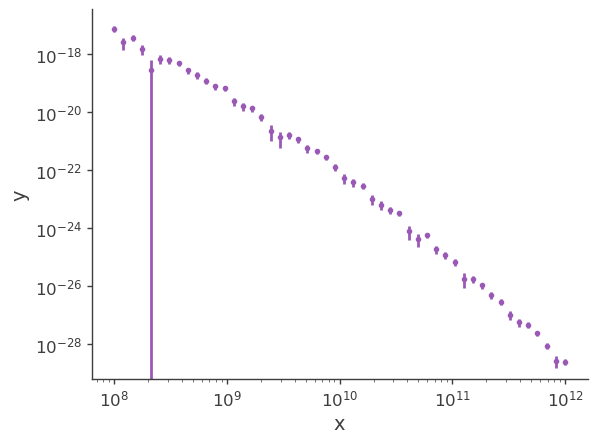

In [17]:
%matplotlib inline
# Assuming the gamma-ray data come from Hadronic interaction, then the model with has the same spectral shape and K, but double the pivot energy

gamma_inject_spectrum=threeML.Log_parabola()
#notice that the ra and dec don't matter, it is only for the spectrum
gamma_injection_source=mla.threeml.IceCubeLike.NeutrinoPointSource(source_name, ra=inject_ra, dec=inject_dec, spectral_shape=gamma_inject_spectrum)

gamma_inject_spectrum.alpha  = -2.79 #HAWC result
gamma_inject_spectrum.beta  = 0.1 #HAWC result
gamma_inject_spectrum.piv = 7 * threeML.u.TeV 
gamma_inject_spectrum.K = 2.35e-13 * threeML.u.TeV**-1*threeML.u.second**-1*threeML.u.cm**-2 #HAWC result
gamma_inject_spectrum.set_units(threeML.u.keV,threeML.u.keV**-1*threeML.u.second**-1*threeML.u.cm**-2) #Fixing the unit help the calculation 

generating_function = gamma_inject_spectrum

# set up the x grig points
x_points = np.logspace(8, 12, 50)

# call the from_function classmethod
xyl_generator = threeML.XYLike.from_function(
    "sim_data",
    function=generating_function,
    x=x_points,
    yerr=0.3 * generating_function(x_points),
)


fig = xyl_generator.plot(x_scale="log", y_scale="log")

Now we have Synthetic gamma-ray Data and the plugin object(xyl_generator is also the plugin object). We can define a model connecting the gamma-ray and neutrino. In here, I assume all the flux are hadronic so the shape will be the same and flux norm will be the same(while pivot is different)

In [18]:
#for the gamma-ray
hypo_gamma_spectrum=threeML.Log_parabola()
hypo_gamma_source=threeML.PointSource(source_name, ra=inject_ra, dec=inject_dec, spectral_shape=hypo_gamma_spectrum) 
hypo_gamma_spectrum.piv = 7 * threeML.u.TeV #match HAWC 7 TeV gamma-ray pivot
hypo_gamma_spectrum.alpha = -2
hypo_gamma_spectrum.alpha.bounds = (-5.0, -1.0)
hypo_gamma_spectrum.beta = 0
hypo_gamma_spectrum.beta.bounds = (-1., 2.)
hypo_gamma_spectrum.K.fix = False #Here we also fit the flux
hypo_gamma_spectrum.set_units(threeML.u.keV,threeML.u.keV**-1*threeML.u.second**-1*threeML.u.cm**-2) #Fixing the unit help the calculation 


In [19]:
#for the neutrino
hypo_spectrum=threeML.Log_parabola()
hypo_source=mla.threeml.IceCubeLike.NeutrinoPointSource(source_name+"_nu", ra=inject_ra, dec=inject_dec, spectral_shape=hypo_spectrum) 
hypo_spectrum.piv = 3.5 * threeML.u.TeV #match HAWC 7 TeV gamma-ray pivot
hypo_spectrum.alpha = -2
hypo_spectrum.alpha.bounds = (-5.0, -1.0)
hypo_spectrum.beta = 0
hypo_spectrum.beta.bounds = (-1., 2.)
hypo_spectrum.K.fix = False #Here we also fit the flux
hypo_spectrum.set_units(threeML.u.keV,threeML.u.keV**-1*threeML.u.second**-1*threeML.u.cm**-2) #Fixing the unit help the calculation 

In [20]:
#Link everything
model=threeML.Model(hypo_source)
model.add_source(hypo_gamma_source)
model.link(model.sources[source_name+"_nu"].spectrum.main.shape.alpha, 
       model.sources[source_name].spectrum.main.shape.alpha)
model.link(model.sources[source_name+"_nu"].spectrum.main.shape.beta, 
       model.sources[source_name].spectrum.main.shape.beta)
model.link(model.sources[source_name+"_nu"].spectrum.main.shape.K, 
       model.sources[source_name].spectrum.main.shape.K)

In [21]:
#Let us calculate how much neutrino we should inject to match the flux of the gamma rays
ns_inject= analysislist.cal_injection_ns(gamma_inject_spectrum.K.value*1e6) 
print("We should inject:")
print(ns_inject)

We should inject:
27.17176921106792


#### Ok we can do the analysis now

In [22]:
analysislist.newton_flux_norm=False
analysislist.injection(n_signal=ns_inject,poisson=True) #Inject signal+scrambling background
IceCubedata = threeML.DataList(analysislist,xyl_generator)
jl = threeML.JointLikelihood(model, IceCubedata)
jl.set_minimizer('minuit')
jl.fit(quiet=True,compute_covariance=True)

11:17:59 INFO      set the minimizer to minuit                                             ]8;id=801327;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=703617;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=368867;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=141174;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

11:18:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=325431;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=465088;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

(                                              value  negative_error  \
 Crab.spectrum.main.Log_parabola.K      2.436171e-22   -1.459157e-23   
 Crab.spectrum.main.Log_parabola.alpha -2.782062e+00   -1.584028e-02   
 Crab.spectrum.main.Log_parabola.beta   9.884621e-02   -6.048198e-03   
 
                                        positive_error         error  \
 Crab.spectrum.main.Log_parabola.K        1.487150e-23  1.473154e-23   
 Crab.spectrum.main.Log_parabola.alpha    1.529385e-02  1.556707e-02   
 Crab.spectrum.main.Log_parabola.beta     6.121894e-03  6.085046e-03   
 
                                                   unit  
 Crab.spectrum.main.Log_parabola.K      1 / (cm2 keV s)  
 Crab.spectrum.main.Log_parabola.alpha                   
 Crab.spectrum.main.Log_parabola.beta                    ,
           -log(likelihood)
 combine          -5.217871
 sim_data         23.898381
 total            18.680510)

We can calculate the TS and best-fit ns on the IceCube again

In [23]:
TS = analysislist.get_log_like() * 2
best_ns = analysislist.get_current_fit_ns()
print(TS,best_ns)

10.435742473338077 31.367863080642085


and the best-fit flux 

In [24]:
print(model.Crab_nu.spectrum.main.Log_parabola.K.value * 1e9)

2.436171163428898e-13


We underestimated the true Flux, but we have a relative weak signal so it is fine.

#### Alternative, we can fit the shape only and let the flux float

In [28]:
#for the gamma-ray
hypo_gamma_spectrum=threeML.Log_parabola()
hypo_gamma_source=threeML.PointSource(source_name, ra=inject_ra, dec=inject_dec, spectral_shape=hypo_gamma_spectrum) 
hypo_gamma_spectrum.piv = 7 * threeML.u.TeV #match HAWC 7 TeV gamma-ray pivot
hypo_gamma_spectrum.alpha = -2
hypo_gamma_spectrum.alpha.bounds = (-5.0, -1.0)
hypo_gamma_spectrum.beta = 0
hypo_gamma_spectrum.beta.bounds = (-1., 2.)
hypo_gamma_spectrum.K.fix = False #Here we also fit the flux
hypo_gamma_spectrum.set_units(threeML.u.keV,threeML.u.keV**-1*threeML.u.second**-1*threeML.u.cm**-2) #Fixing the unit help the calculation 
#for the neutrino
hypo_spectrum=threeML.Log_parabola()
hypo_source=mla.threeml.IceCubeLike.NeutrinoPointSource(source_name+"_nu", ra=inject_ra, dec=inject_dec, spectral_shape=hypo_spectrum) 
hypo_spectrum.piv = 3.5 * threeML.u.TeV #match HAWC 7 TeV gamma-ray pivot
hypo_spectrum.alpha = -2
hypo_spectrum.alpha.bounds = (-5.0, -1.0)
hypo_spectrum.beta = 0
hypo_spectrum.beta.bounds = (-1., 2.)
hypo_spectrum.K.fix = True #Here we don't fit the flux in 3ML
hypo_spectrum.set_units(threeML.u.keV,threeML.u.keV**-1*threeML.u.second**-1*threeML.u.cm**-2) #Fixing the unit help the calculation 
#Line everything
model=threeML.Model(hypo_source)
model.add_source(hypo_gamma_source)
model.link(model.sources[source_name+"_nu"].spectrum.main.shape.alpha, 
       model.sources[source_name].spectrum.main.shape.alpha)
model.link(model.sources[source_name+"_nu"].spectrum.main.shape.beta, 
       model.sources[source_name].spectrum.main.shape.beta)


In [29]:
analysislist.newton_flux_norm=True
analysislist.injection(n_signal=ns_inject,poisson=True) #Inject signal+scrambling background
IceCubedata = threeML.DataList(analysislist,xyl_generator)
jl = threeML.JointLikelihood(model, IceCubedata)
jl.set_minimizer('scipy')
jl.fit(quiet=True,compute_covariance=True)

11:44:19 INFO      set the minimizer to minuit                                             ]8;id=43049;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=307471;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to SCIPY                                              ]8;id=173992;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=862559;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

11:44:22 WARNING   Covariance matrix is NOT semi-positive definite. Cannot estimate errors.     ]8;id=566675;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=202070;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/minimizer/minimization.py#893\893]8;;\
                  This can happen for many reasons, the most common being one or more                              
                  unconstrained parameters                                                                         

         WARNING   Negative element on diagonal of covariance matrix                            ]8;id=497057;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=930649;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/minimizer/minimization.py#726\726]8;;\

11:44:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=242257;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=798464;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   97.32 percent of samples have been thrown away because they failed the  ]8;id=724462;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=675660;file:///data/disk01/home/jasonfan/miniconda3/envs/mladev/lib/python3.9/site-packages/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

(                                              value  negative_error  \
 Crab.spectrum.main.Log_parabola.K      1.003729e-30    6.714316e-26   
 Crab.spectrum.main.Log_parabola.alpha -1.000050e+00   -3.115075e+00   
 Crab.spectrum.main.Log_parabola.beta   2.848068e-01   -7.083825e-01   
 
                                        positive_error     error  \
 Crab.spectrum.main.Log_parabola.K            0.001745  0.000873   
 Crab.spectrum.main.Log_parabola.alpha       -0.561421  1.276827   
 Crab.spectrum.main.Log_parabola.beta        -0.083473  0.312455   
 
                                                   unit  
 Crab.spectrum.main.Log_parabola.K      1 / (cm2 keV s)  
 Crab.spectrum.main.Log_parabola.alpha                   
 Crab.spectrum.main.Log_parabola.beta                    ,
           -log(likelihood)
 combine          -2.327887
 sim_data        329.705973
 total           327.378086)